In [1]:
from scipy import signal

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

# Ejercicio 1

## Item a
Son ortogonales, porque si se calcula la correlación entre ambos $s_1(t)$ y $s_2(t)$, el resultado es cero. Para verlo rápido, me fije en un eje vertical imaginario que se encuentre en el medio de los símbolos, y como un símbolo es par y el otro es impar, el resultado del producto es una función par que se anula cuando se integra sobre todo el intervalo.

## Item b

In [4]:
s1 = np.array([1, 1, -1, -1, -1, -1, -1, -1, 1, 1], dtype=np.float32)
s2 = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1], dtype=np.float32)
print(f's1(t): {s1}')
print(f's2(t): {s2}')

s1(t): [ 1.  1. -1. -1. -1. -1. -1. -1.  1.  1.]
s2(t): [ 1.  1.  1.  1.  1. -1. -1. -1. -1. -1.]


## Item c

In [5]:
s1_2 = s1-s2
h_t = np.flip(s1_2)
print(f'h(t): {s1_2}')

h(t): [ 0.  0. -2. -2. -2.  0.  0.  0.  2.  2.]


## Item d
Para el item (b) deberían implementarse dos correladores, uno para cada símbolo, y luego la regla de decisión deberá elegir qué símbolo se recibió en función de cuál correlador es mayor. Es decir, se queda con el símbolo cuyo correlador arroja el mayor resultado.
Para el item (c), el umbral de decisión será,

$$\gamma = \frac{a_1+a_2}{2} = 0$$

*Nota: en ambos escenarios se asume que los símbolos son equiprobables.*

In [6]:
a1_t = signal.lfilter(h_t, [1], s1)
a2_t = signal.lfilter(h_t, [1], s2)

In [7]:
a1 = a1_t[-1]
a2 = a2_t[-1]
print(f'a1 = {a1}')
print(f'a2 = {a2}')

a1 = 10.0
a2 = -10.0


## Item e

In [8]:
r_t = np.array([1.73, 1.55, -0.62, -0.31, -0.85, -0.05, -0.63, -0.46, 1.00, 1.82, 1.09, 1.55, -0.26, -0.56, -0.10, -0.65, -0.70, -0.91, 1.59, 1.13, 1.76, 1.45, 1.02, 1.91, 1.83, -0.91, -0.90, -0.60, -0.06, -0.18, 1.83, 1.72, 1.59, 1.85, 1.97, -0.75, -0.36, -0.58, -0.51, -0.43, 1.98, 1.85, -0.88, -0.73, -0.51, -0.68, -0.76, -0.24, 1.20, 1.60, 1.46, 1.73, 1.91, 1.91, 1.98, -0.74, -0.14, -0.61, -0.65, -0.16, 1.78, 1.77, -0.62, -0.70, -0.56, -0.79, -0.57, -0.86, 1.73, 1.56])

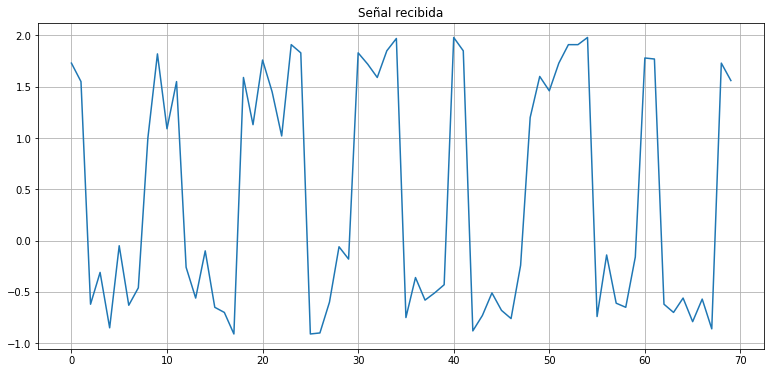

In [14]:
plt.figure(figsize=(13, 6))
plt.title('Señal recibida')
plt.plot(r_t)
plt.grid()
plt.show()

In [10]:
a_t = signal.lfilter(h_t, [1], r_t)
decision_t = np.array([10, 20, 30, 40, 50, 60, 70]) - 1
d_t = a_t[decision_t]

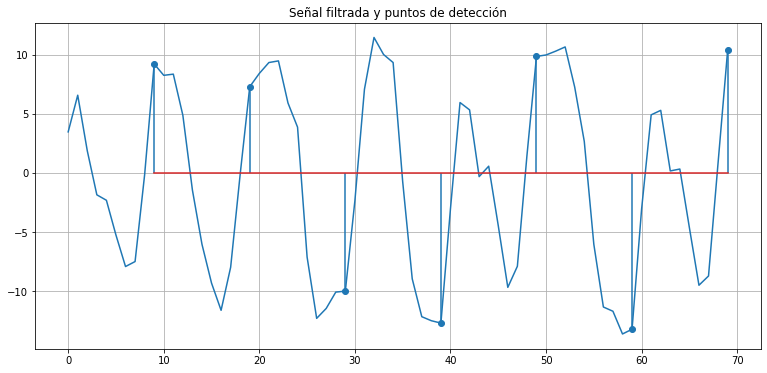

In [15]:
plt.figure(figsize=(13, 6))
plt.title('Señal filtrada y puntos de detección')
plt.plot(a_t)
plt.stem(decision_t, d_t)
plt.grid()
plt.show()

In [12]:
y_t = np.where(d_t > 0, 1, 0)
print(f'y(t): {y_t}')

y(t): [1 1 0 0 1 0 1]
